#### Data Cleaning 2

Exercises designed to go deeper with data cleaning as part of the feature engineering process.  Different methods to replace nan values

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

SQLAlchemy is a popular Python library that's used for accessing databases and querying them. Throughout this module, we'll use it to access Thinkful's database to load the data we'll use in our examples and in the assignments.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'youtube'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

youtube_df = pd.read_sql_query('select * from youtube',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
youtube_df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [4]:
# dtypes is what I have traditionally used to find the data types of attributes
youtube_df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [5]:
# info provides data type, along with the number row values of that type
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [6]:
# replace "--" values to empty strings

youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

In [7]:
youtube_df.dtypes

Rank              object
Grade             object
Channel name      object
Video Uploads    float32
Subscribers      float32
Video views        int64
dtype: object

In [8]:
# what percent of values in each column are null?
youtube_df.isnull().sum()*100/youtube_df.isnull().count()

Rank             0.00
Grade            0.00
Channel name     0.00
Video Uploads    0.12
Subscribers      7.74
Video views      0.00
dtype: float64

In [9]:
# replace white space values with nan
youtube_df.Grade = youtube_df.Grade.apply(str.strip).replace("", np.nan)

## Continuous data - filling missing values

### Fill missing values - Imputation

In [10]:
# impute missing values with mean
youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

In [11]:
# now compare the percent of null values
youtube_df.isnull().sum()*100/youtube_df.count()

Rank             0.000000
Grade            0.120144
Channel name     0.000000
Video Uploads    0.000000
Subscribers      0.000000
Video views      0.000000
dtype: float64

### Fill missing values - Interpolation
generally used for time series data where we are expecting continuity in a variable

## Categorical data - filling missing values
1. we can't use something like mean
1. instead we could assign a value like "other" for all the miscelaneous categories


In [12]:
# fill in missing values in Category with the the value of the next highest-ranked channel's category
grade_list = youtube_df.Grade

for i in range(0, len(youtube_df.Grade)):
    if pd.isnull(youtube_df.Grade[i]):
        youtube_df.Grade[i] = youtube_df.Grade[i-1]
        
youtube_df["Grade"].unique()

array(['A++', 'A+', 'A', 'A-', 'B+'], dtype=object)

## Data Cleaning/Validation Assignment

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [13]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [14]:
# glance at the dataframe
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [15]:
# how large is the dataset?
education_df.shape

(1492, 25)

### 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [16]:
# what are the variable types?
education_df.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [17]:
education_df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [18]:
# how many null values are in each column?
education_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [19]:
education_df.isnull().count()

PRIMARY_KEY                     1492
STATE                           1492
YEAR                            1492
ENROLL                          1492
TOTAL_REVENUE                   1492
FEDERAL_REVENUE                 1492
STATE_REVENUE                   1492
LOCAL_REVENUE                   1492
TOTAL_EXPENDITURE               1492
INSTRUCTION_EXPENDITURE         1492
SUPPORT_SERVICES_EXPENDITURE    1492
OTHER_EXPENDITURE               1492
CAPITAL_OUTLAY_EXPENDITURE      1492
GRADES_PK_G                     1492
GRADES_KG_G                     1492
GRADES_4_G                      1492
GRADES_8_G                      1492
GRADES_12_G                     1492
GRADES_1_8_G                    1492
GRADES_9_12_G                   1492
GRADES_ALL_G                    1492
AVG_MATH_4_SCORE                1492
AVG_MATH_8_SCORE                1492
AVG_READING_4_SCORE             1492
AVG_READING_8_SCORE             1492
dtype: int64

In [20]:
# compare the percent of null values
education_df.isnull().sum()/education_df.isnull().count().sort_values(ascending=False)

AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SCORE             0.666220
CAPITAL_OUTLAY_EXPENDITURE      0.142091
ENROLL                          0.176273
FEDERAL_REVENUE                 0.142091
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
GRADES_KG_G                     0.088472
GRADES_PK_G                     0.115952
INSTRUCTION_EXPENDITURE         0.142091
LOCAL_REVENUE                   0.142091
OTHER_EXPENDITURE               0.176273
PRIMARY_KEY                     0.000000
STATE                           0.000000
STATE_REVENUE                   0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
TOTAL_EXPENDITURE               0.142091
TOTAL_REVENUE                   0.142091
YEAR            

### 2. Notice that the data has a time dimension (year). For this assignment, forget about time and **treat all the observations as if they're from the same year**. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

It makes sense to impute the mean for all the currency attributes(Total_Revenue, Federal_Revenue, ect.)

However, for math and reading scores that have over half nan values, this might be misleading.

In [22]:
education_df2 = education_df.copy()

In [24]:
education_df2.columns[3:20]

Index(['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE',
       'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G'],
      dtype='object')

In [25]:
# For example, this doesn't work:
# for col in fill_list:
#     education2_df.loc[:, col].fillna(education2_df.loc[:, col].mean(), inplace=True)

# this works
for col in education_df2.columns[3:30]:
    education_df2.loc[:, col] = education_df2.loc[:, col].fillna(education_df2.loc[:, col].mean())

In [26]:
# verify that the fillna above worked properly
education_df2.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.

In [27]:
# create copy
education_df3 = education_df.copy()

In [28]:
education_df3.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [45]:
education_df3.columns[3:]

Index(['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE',
       'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [30]:
years = education_df3.YEAR.unique()

In [31]:
years

array([1992, 2001, 1993, 2016, 1994, 1995, 1996, 1997, 1998, 1999, 2017,
       2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015], dtype=int64)

Comparison using .loc vs [] at the end

In [48]:
education_df3[education_df3["YEAR"] == year][col].mean()

265.007992255131

In [53]:
education_df3.loc[education_df3["YEAR"] == year, col].mean()

265.007992255131

### for some reason this isn't working properly

In [46]:
# for each year find the mean, then fill that into nan rows
# super powerful way to do this to a bunch of columns at once

for col in education_df3.columns[3:]:
    for year in years:
        education_df3.loc[education_df3["YEAR"] == year, col] = \
        education_df3.loc[education_df3["YEAR"] == year, col].fillna(
            education_df3[education_df3["YEAR"] == year][col].mean())
        
# is there a reason the fillna code doesn't use loc
# but instead [col]?
# they seem to provide the same output

In [47]:
# but for some reason this isn't filling in all null values

education_df3.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          107
TOTAL_REVENUE                    51
FEDERAL_REVENUE                  51
STATE_REVENUE                    51
LOCAL_REVENUE                    51
TOTAL_EXPENDITURE                51
INSTRUCTION_EXPENDITURE          51
SUPPORT_SERVICES_EXPENDITURE     51
OTHER_EXPENDITURE               107
CAPITAL_OUTLAY_EXPENDITURE       51
GRADES_PK_G                     102
GRADES_KG_G                     102
GRADES_4_G                      102
GRADES_8_G                      102
GRADES_12_G                     102
GRADES_1_8_G                    102
GRADES_9_12_G                   102
GRADES_ALL_G                    102
AVG_MATH_4_SCORE                860
AVG_MATH_8_SCORE                860
AVG_READING_4_SCORE             860
AVG_READING_8_SCORE             860
dtype: int64

### 4. This time, fill in the missing values using interpolation (extrapolation).


In [36]:
education_df4 = education_df.copy()

In [37]:
education_df4.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [38]:
# without using limit_direction= 'both'
for col in education_df4.columns[3:30]:
    education_df4.loc[:, col] = education_df4.loc[:, col].interpolate()

In [59]:
education_df4.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

In [40]:
# using limit_direction= 'both'
for col in education_df4.columns[3:30]:
    education_df4.loc[:, col] = education_df4.loc[:, col].interpolate(limit_direction='both')

In [41]:
# limit_direction= 'both' does the trick and fills all nan values
education_df4.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

### 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [69]:
pd.options.display.float_format = '{:,.0f}'.format

for col in education_df4.columns[3:30]:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([education_df[col], 
                     education_df2[col],
                     education_df3[col], 
                     education_df4[col]], axis=1).agg(['mean', 'std', 'count']))


Statistics for columns: ENROLL
         ENROLL  ENROLL    ENROLL    ENROLL
mean    915,931 915,931   916,165   983,876
std   1,065,280 966,773 1,003,532 1,006,773
count     1,229   1,492     1,385     1,492
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
mean       9,092,082      9,092,082      9,084,108     11,111,644
std       11,745,187     10,878,184     11,102,043     12,001,549
count          1,280          1,492          1,441          1,492
Statistics for columns: FEDERAL_REVENUE
       FEDERAL_REVENUE  FEDERAL_REVENUE  FEDERAL_REVENUE  FEDERAL_REVENUE
mean           766,372          766,372          766,275          892,269
std          1,145,242        1,060,702        1,085,057        1,106,788
count            1,280            1,492            1,441            1,492
Statistics for columns: STATE_REVENUE
       STATE_REVENUE  STATE_REVENUE  STATE_REVENUE  STATE_REVENUE
mean       4,216,553      4,216,553      4,213,597 

### Visualize Differences

In [71]:
# index all the columns to be able to plot
for i, col in enumerate(education_df4.columns[3:30]):
    print (i, col)

0 ENROLL
1 TOTAL_REVENUE
2 FEDERAL_REVENUE
3 STATE_REVENUE
4 LOCAL_REVENUE
5 TOTAL_EXPENDITURE
6 INSTRUCTION_EXPENDITURE
7 SUPPORT_SERVICES_EXPENDITURE
8 OTHER_EXPENDITURE
9 CAPITAL_OUTLAY_EXPENDITURE
10 GRADES_PK_G
11 GRADES_KG_G
12 GRADES_4_G
13 GRADES_8_G
14 GRADES_12_G
15 GRADES_1_8_G
16 GRADES_9_12_G
17 GRADES_ALL_G
18 AVG_MATH_4_SCORE
19 AVG_MATH_8_SCORE
20 AVG_READING_4_SCORE
21 AVG_READING_8_SCORE


In [92]:
# concatenate dataframe with values side by side
# rather than long format (the default for concat operator)

df = pd.concat([education_df[col], education_df2[col],
                     education_df3[col], education_df4[col]], axis=1)
df.head()

,AVG_READING_8_SCORE,AVG_READING_8_SCORE,AVG_READING_8_SCORE,AVG_READING_8_SCORE
0,nan,264,263,259
1,259,259,259,259
2,262,262,262,262
3,265,265,265,265
4,nan,264,263,266


In [94]:
len(education_df4.columns[3:30])

22

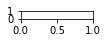

In [99]:
plt.subplot(len(education_df4.columns[3:30]), 4)

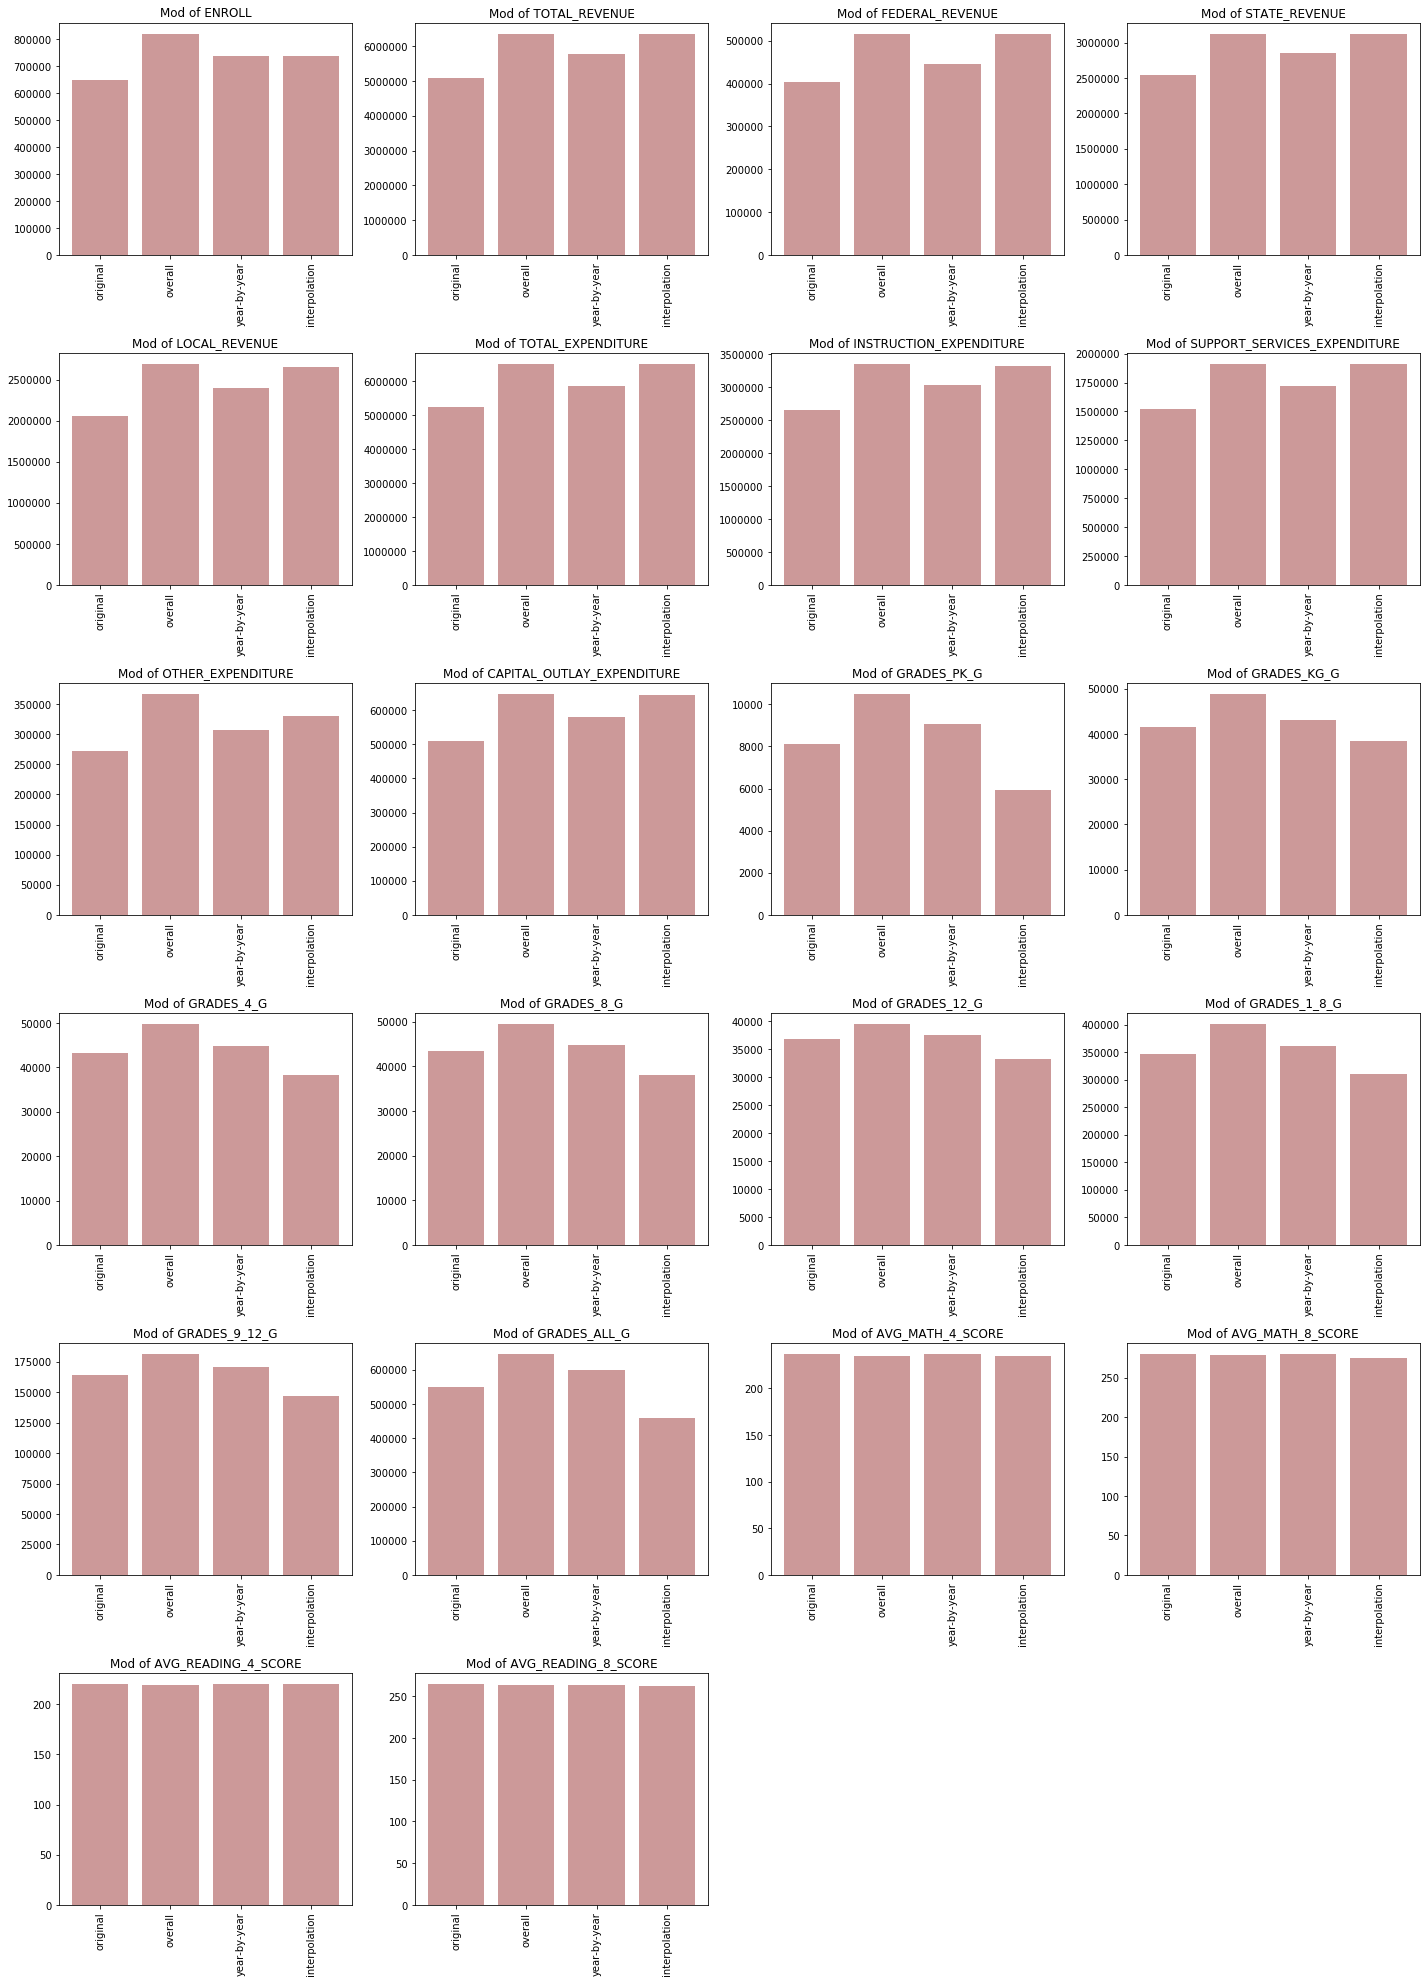

In [101]:

fig = plt.figure(figsize=(20,100))

for integer, col in enumerate(education_df4.columns[3:30]):
    df = pd.concat([education_df[col], education_df2[col],
                     education_df3[col], education_df4[col]], axis=1)
    
    # set up subplots
    # 4 columns wide
    plt.subplot(len(education_df4.columns[3:30]), 4, integer+1)
    
    plt.bar(["original", "overall", "year-by-year", "interpolation"], 
            df.median(),
           color='maroon',
           alpha=.4)
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()

### Comparison of standard deviation

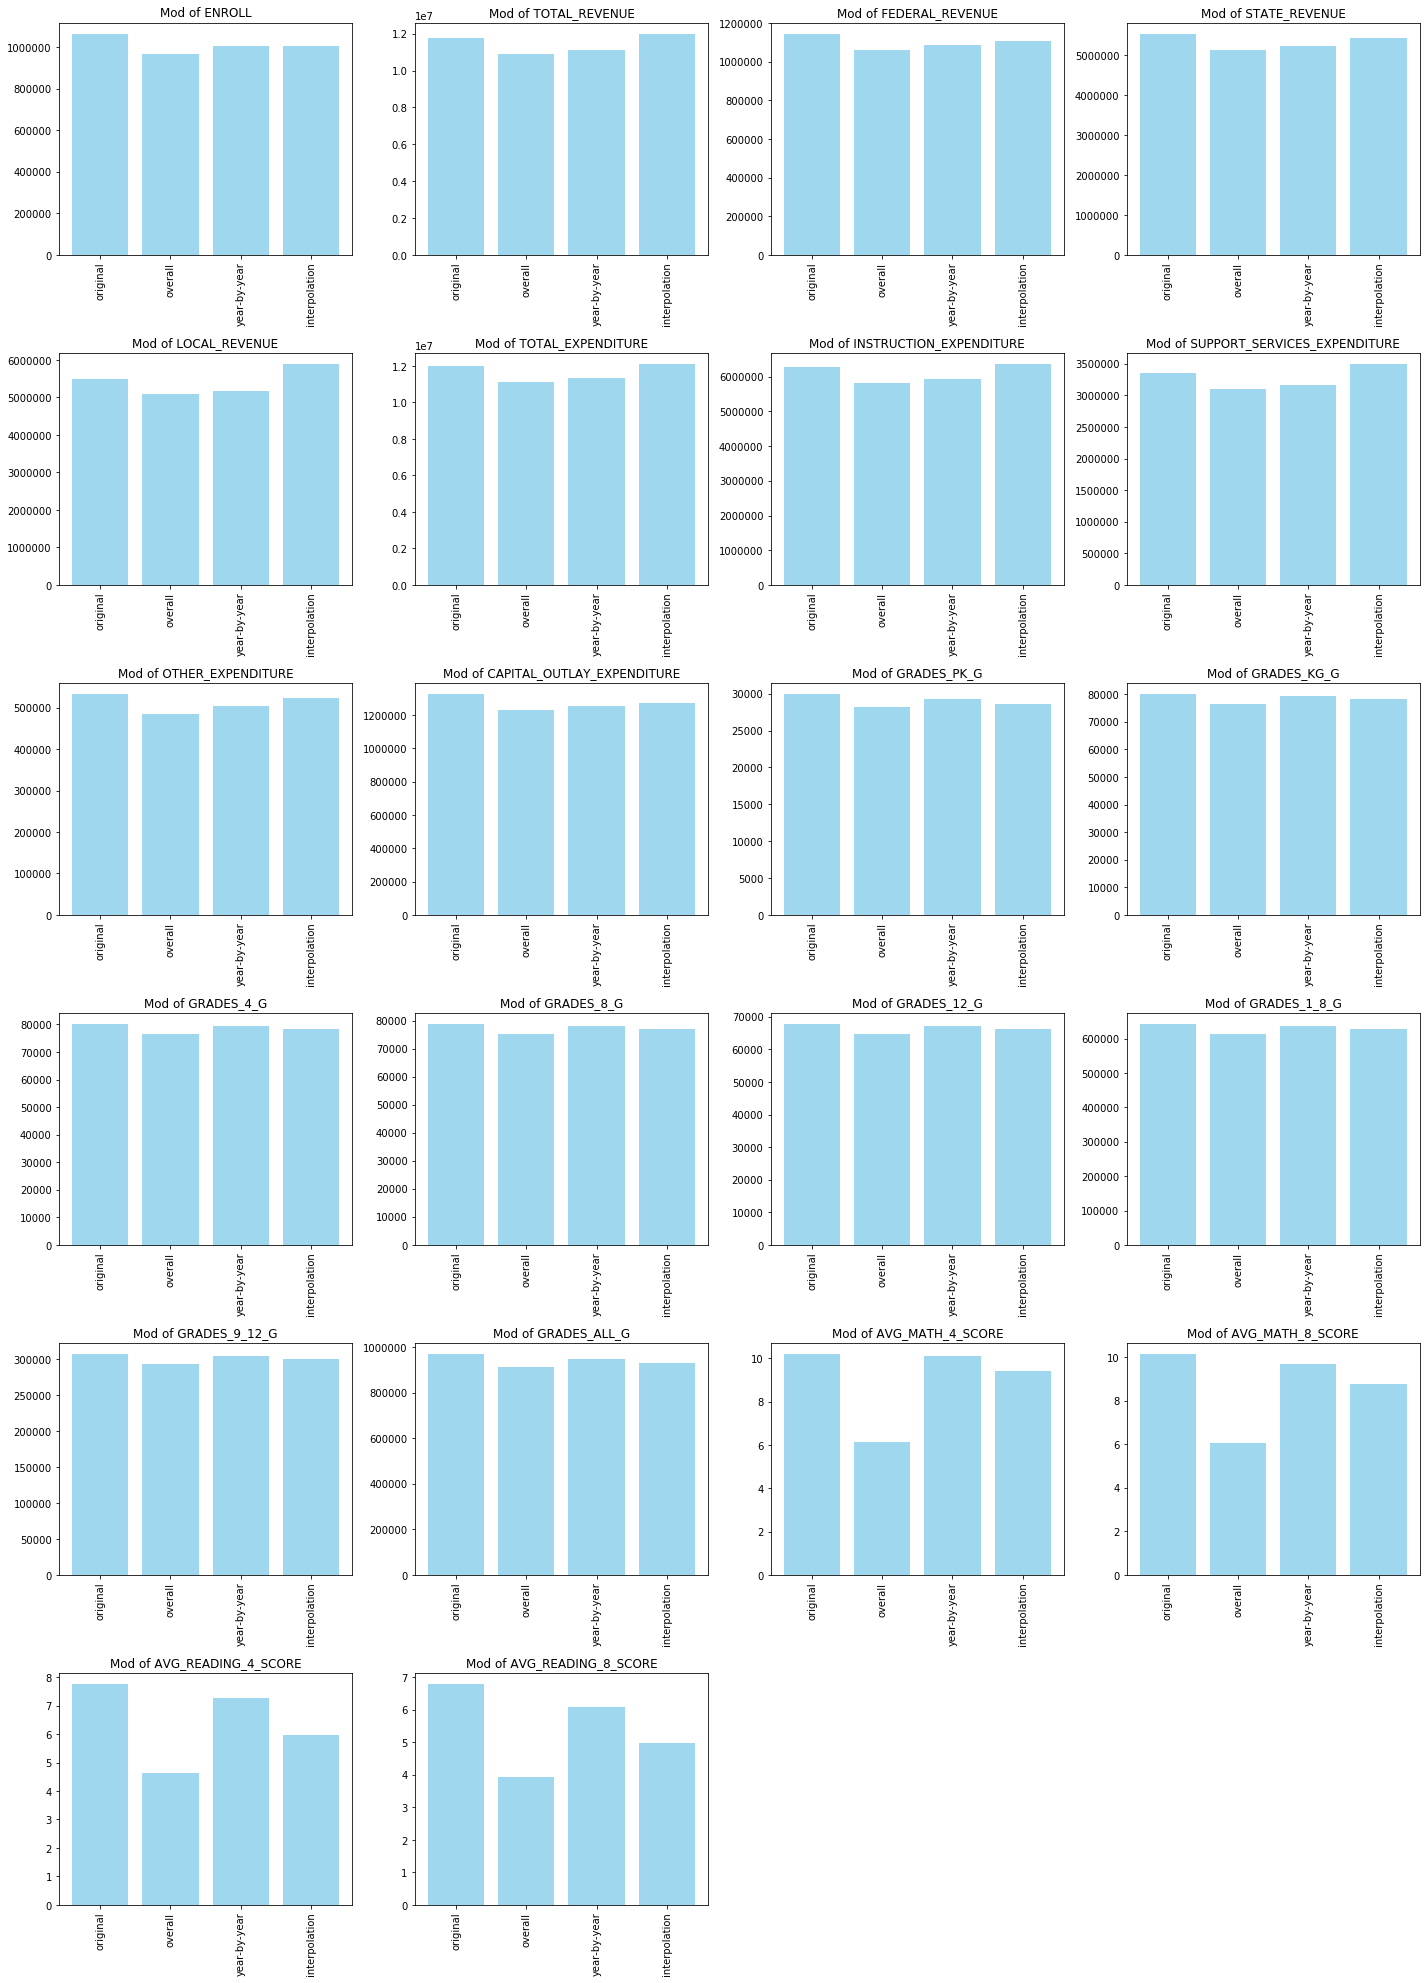

In [103]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(education_df4.columns[3:30]):
    df = pd.concat([education_df[col], education_df2[col],
                     education_df3[col], education_df4[col]], axis=1)
    
    plt.subplot(len(education_df4.columns[3:30]), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], 
            df.std(),
            color='skyblue',
           alpha=.8)
    
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()